# 1.- Ecuación logıstica

La solución de la ecuación
$$\frac{d p}{d t} = ap−bp^2, \;\; p(0) =p0$$
Veamos ahora como se resuelve con SymPy

Primeramente importamos la libreria SymPy a Python,

In [1]:
>>> import sympy as sp

Definimos las variables independiente y dependiente ası como los parametros de forma simbolica

In [10]:
import sympy as sp

t = sp.symbols('t')
p=sp.Function('p')
a=sp.symbols('a')
b=sp.symbols('b')
p0=sp.symbols('p0')

Ahora definimos la ecuacion diferencial y la resolvemos con la condicion inicial usando dsolve

In [11]:
ode=sp.Eq(sp.Derivative(p(t),t)-a*p(t)+b*p(t)*p(t),0)
sol = sp.dsolve(ode,p(t),ics={p(0):p0})

Obteniendo ası la solucion

In [14]:
# Definir las variables simbólicas
t, a, b, p0 = sp.symbols('t a b p0')
p = sp.Function('p')(t)  # Definir p como función de t

# Definir la ecuación correctamente
eq = sp.Eq(
    p,
    a * sp.exp(a * (t + sp.log(b * p0 / (-a + b * p0)) / a)) /
    (b * (sp.exp(a * (t + sp.log(b * p0 / (-a + b * p0)) / a)) - 1))
)

# Mostrar la ecuación corregida
eq

Eq(p(t), a*exp(a*(t + log(b*p0/(-a + b*p0))/a))/(b*(exp(a*(t + log(b*p0/(-a + b*p0))/a)) - 1)))

Definimos a continuacion los valores de a, b y p0, y evaluamos las respectivas soluciones (una para cada condicion inicial)

In [15]:
constants={a:0.03,b:0.0001,p0:5}
sol1=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:6}
sol2=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:7}
sol3=sol.subs(constants)

La funcion lambdify permite definir una funcion a partir de la expresion simbolica:

In [17]:
func1 = sp.lambdify(t,sol1.rhs,'numpy')
func2 = sp.lambdify(t,sol2.rhs,'numpy')
func3 = sp.lambdify(t,sol3.rhs,'numpy')

A continuacion, importamos los modulosscipy, matplotlib y pyplotpara graficar nuestras soluciones

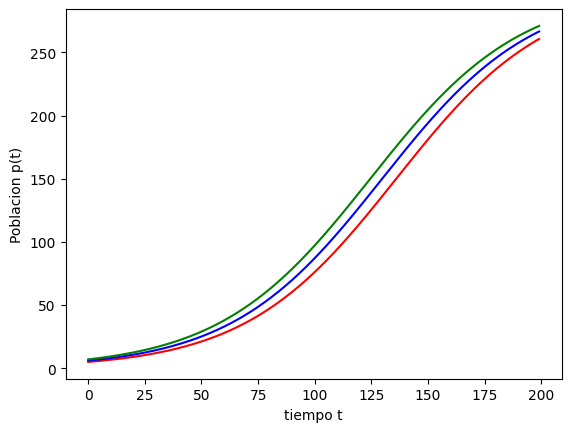

In [21]:
import numpy as np  # Importar NumPy

tt = np.arange(0, 200, 1)  # Usar np.arange() en lugar de scipy.arange()
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(tt,pp1,'r',tt,pp2,'b',tt,pp3,'g')
plt.xlabel('tiempo t')
plt.ylabel('Poblacion p(t)')
plt.show()

2. Ecuacion de Lagrange

$$ y= 2xy'+ log(y') $$
Para resolver con Python usamos:

In [22]:
from sympy import *
import sympy as sp

x=sp.symbols('x')
y=sp.Function('y')
ode2=sp.Eq(log(sp.Derivative(y(x),x))+2*x*sp.Derivative(y(x),x)-y(x),0)
sol2 = sp.dsolve(ode2,y(x))

In [33]:
from sympy import *
import sympy as sp

x = sp.symbols('x')
y = sp.Function('y')  # Define y as a function

# Now you can use y(x) in your equations
eq = Eq(C1 - y(x) - log(LambertW(2 * x * exp(y(x))) + 2) + LambertW(2 * x * exp(y(x))), 0)

# Display the equation
eq

Eq(C1 - y(x) - log(LambertW(2*x*exp(y(x))) + 2) + LambertW(2*x*exp(y(x))), 0)

<ipython-input-35-4f2c0e81b62c>:15: RuntimeWarning: invalid value encountered in sqrt
  y = np.log(((4 * C1 * x + 1) ** (1/2) - 1) / (2 * x)) + (4 * C1 * x + 1) ** (1/2) - 1
<ipython-input-35-4f2c0e81b62c>:15: RuntimeWarning: invalid value encountered in log
  y = np.log(((4 * C1 * x + 1) ** (1/2) - 1) / (2 * x)) + (4 * C1 * x + 1) ** (1/2) - 1
<ipython-input-35-4f2c0e81b62c>:15: RuntimeWarning: divide by zero encountered in log
  y = np.log(((4 * C1 * x + 1) ** (1/2) - 1) / (2 * x)) + (4 * C1 * x + 1) ** (1/2) - 1


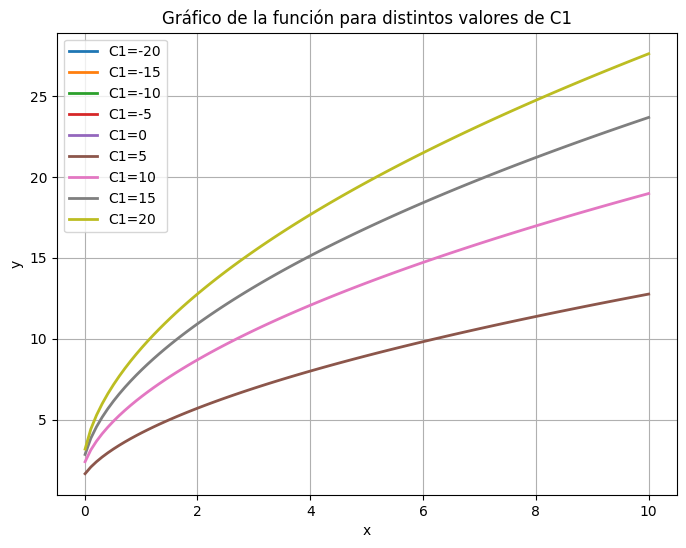

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de x
x = np.linspace(0.01, 10, 100)  # Evitamos x=0 para evitar división por cero

# Definir los valores de C1
C1_values = [-20, -15, -10, -5, 0, 5, 10, 15, 20]

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar para cada valor de C1
for C1 in C1_values:
    y = np.log(((4 * C1 * x + 1) ** (1/2) - 1) / (2 * x)) + (4 * C1 * x + 1) ** (1/2) - 1
    plt.plot(x, y, linewidth=2, label=f'C1={C1}')

# Configurar la gráfica
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de la función para distintos valores de C1')

# Mostrar la gráfica
plt.show()


3. Resonancia
$$y''+ 16y= 8 sen(4t),  y(0) = 1,  y'(0) = 0$$

Para resolver con Python:

In [36]:
from sympy import *
import sympy as sp
t=sp.symbols('t')
y=sp.Function('y')
ode3=sp.Eq(sp.Derivative(y(t),t,t)+16*y(t)-8*sin(4*t),0)

Resolvemos la ecuacion diferencia:

In [37]:
sol3 = sp.dsolve(ode3,y(t))

para obtener:

In [39]:
from sympy import *
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')
C1, C2 = sp.symbols('C1, C2')  # Define C1 and C2 as symbols

ode3 = sp.Eq(sp.Derivative(y(t), t, t) + 16 * y(t) - 8 * sin(4 * t), 0)
sol3 = sp.dsolve(ode3, y(t))

# Now you can use C1 and C2 in your equation
Eq(y(t), C2 * sin(4 * t) + (C1 - t) * cos(4 * t))

Eq(y(t), C2*sin(4*t) + (C1 - t)*cos(4*t))

Vamos ahora a definir las condiciones iniciales y substituirlas en la solucion:

In [40]:
const=sp.solve([sol3.rhs.subs(t,0)-1, sol3.rhs.diff(t,1).subs(t,0)-0])
C1, C2 = sp.symbols('C1,C2')
sol3=sol3.subs(const)

Definimos una funcion a partir de la solucion simbolica obtenida

In [42]:
func1 = sp.lambdify(t,sol3.rhs,'numpy')
import numpy as np # Import numpy
xx = np.arange(0,10,.1) # Use np.arange instead of scipy.arange
yy1 = func1(xx)

Y graficamos con los comandos:

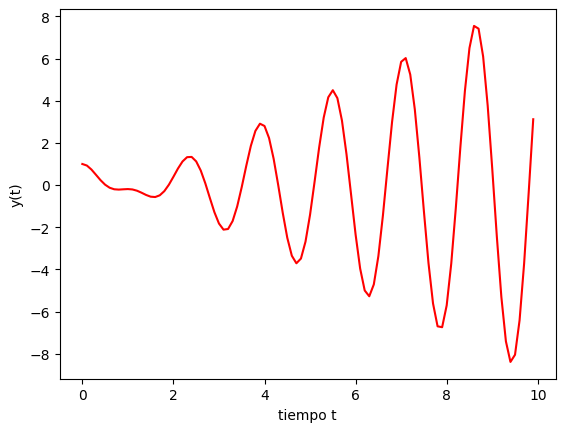

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(xx,yy1,'r')
plt.xlabel('tiempo t')
plt.ylabel('y(t)')
plt.show()

4. Ecuacion de tercer orden
$$y'''−y''−y'+y=g(t)$$

In [44]:
from sympy import *
import sympy as sp
t=sp.symbols('t')
y=sp.Function('y')
g=sp.Function('g')
ode4=sp.Eq(sp.Derivative(y(t),t,3)-sp.Derivative(y(t),t,t)-sp.Derivative(y(t),t)+y(t)-g(t),0)
sol4 = sp.dsolve(ode4,y(t))

Obteniendo ası la solucion

In [46]:
from sympy import *
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')
g = sp.Function('g')
C1, C2, C3 = sp.symbols('C1, C2, C3')  # Define C1, C2, and C3 as symbols

ode4 = sp.Eq(sp.Derivative(y(t), t, 3) - sp.Derivative(y(t), t, t) - sp.Derivative(y(t), t) + y(t) - g(t), 0)
sol4 = sp.dsolve(ode4, y(t))

# Now you can use C1, C2, and C3 in your equation
Eq(y(t), (C1 + Integral(g(t) * exp(t), t) / 4) * exp(-t) + (C2 + t * (C3 + Integral(g(t) * exp(-t), t) / 2) - Integral((2 * t + 1) * g(t) * exp(-t), t) / 4) * exp(t))

Eq(y(t), (C1 + Integral(g(t)*exp(t), t)/4)*exp(-t) + (C2 + t*(C3 + Integral(g(t)*exp(-t), t)/2) - Integral((2*t + 1)*g(t)*exp(-t), t)/4)*exp(t))

5. Una ecuacion homogenea de Cauchy-Euler de cuarto orden

$$x^4y^{(4)}(x) + 6x^3y^{(3)}(x) + 9x^2y''(x) + 3xy'(x) +y(x) = 0$$

In [54]:
from sympy import *
import sympy as sp
x=sp.symbols('x')
y=sp.Function('y')
ode5=sp.Eq(x**4*sp.Derivative(y(x),x,4)+6*x*x*x*sp.Derivative(y(x),x,3)+9*x**2*sp.Derivative(y(x),x,2)+3*x*sp.Derivative(y(x),x)+y(x),0)
sol5 = sp.dsolve(ode5,y(x))

Para obtener

In [56]:
from sympy import *
import sympy as sp

x = sp.symbols('x')
y = sp.Function('y')
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')  # Define C1, C2, C3, and C4 as symbols

# Now you can use C1, C2, C3, and C4 in your equation
Eq(y(x), C3 * sin(log(x)) + C4 * cos(log(x)) + (C1 * sin(log(x)) + C2 * cos(log(x))) * log(x))

Eq(y(x), C3*sin(log(x)) + C4*cos(log(x)) + (C1*sin(log(x)) + C2*cos(log(x)))*log(x))

La literatura nos dice que un metodo de solucion de las ecuaciones de Cauchy Euler implica la substitucion $$ y=x^n$$ En Python podemos usar:

In [57]:
n=sp.symbols('n')
eq=simplify(ode5.subs(y(x),x**n))
factor(eq)

Eq(x**n*(n**2 + 1)**2, 0)

6. Un problema de valor inicial con deltas de Dirac como fuentes
$$y′′(t)−4y′(t) + 4y(t) = 3δ(t−1) +δ(t−2),  y(0) = 1,  y′(0) = 1$$

In [58]:
from sympy import *
import sympy as sp
t=sp.symbols('t')
y=sp.Function('y')
ode6=sp.Eq(sp.Derivative(y(t),t,2)-4*sp.Derivative(y(t),t)+4*y(t),3*DiracDelta(t-1)+DiracDelta(t-2))
sol6 = sp.dsolve(ode6)
constants=solve([sol6.rhs.subs(t,0)-1,sol6.rhs.diff(t,1).subs(t,0)-1])
sol6.subs(constants)

Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))

y obtenemos

In [59]:
Eq(y(t), (t*(exp(-4)*Heaviside(t-2)+3*exp(-2)*Heaviside(t-1)-1)-2*exp(-4)*Heaviside(t-2) - 3*exp(-2)*Heaviside(t-1)+1)*exp(2*t))

Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))